In [1]:
%pylab inline
import os
import os.path
import pytest
import os.path as op
import sys
import matplotlib.pyplot as plt
import scipy
import glob
from pathlib import Path

sys.path.insert(0, str(Path("~/projects/io3d").expanduser()))

# import imtools.trainer3d
# import imtools.datasets
# import imtools.ml
import itertools
import io3d
from loguru import logger

# import bodynavigation
# logger.disable("io3d")
logger.remove()
logger.add(sys.stderr, level="INFO")

Populating the interactive namespace from numpy and matplotlib


1

# Read multiple datasets in the same way

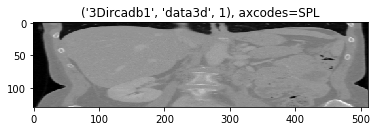

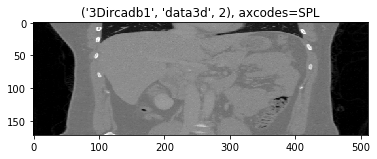

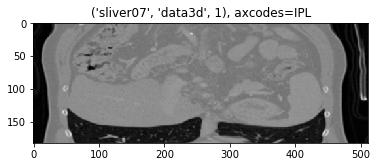

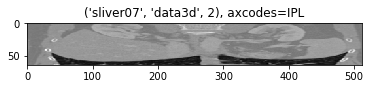

In [14]:
# number of 3d images per dataset
n = 2
for args in itertools.product(["3Dircadb1", "sliver07"], ["data3d"], range(1, 1 + n)):
    #     print(args)
    datap = io3d.datasets.read_dataset(*args)
    plt.figure()
    plt.imshow(datap.data3d[:, 256, :], cmap="gray")
    plt.title(f"{args}, axcodes={datap.orientation_axcodes}")
    plt.show()

## Get the same orientations with `axcodes`

The `orientations_axcodes` is three letter code describing the reqired orientation of data. 
For more details see

https://medium.com/@ashkanpakzad/understanding-3d-medical-image-orientation-for-programmers-fcf79c7beed0

https://nipy.org/nibabel/reference/nibabel.orientations.html


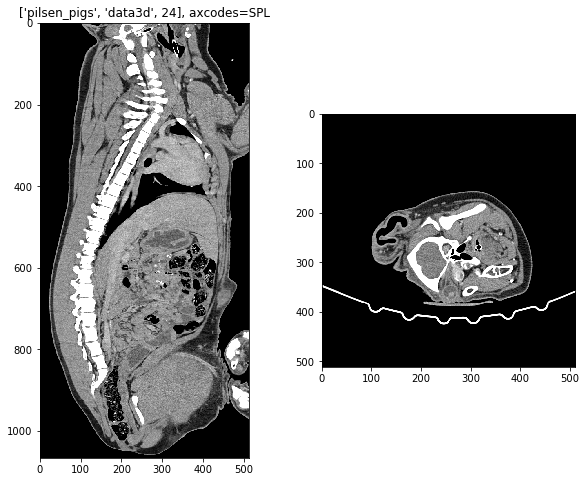

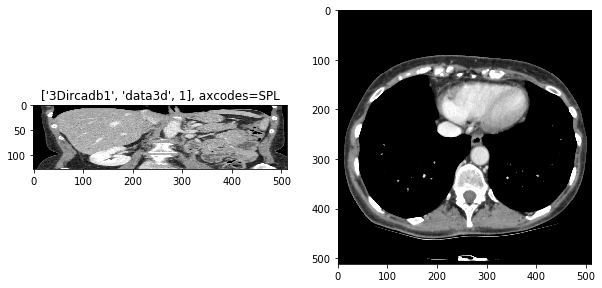

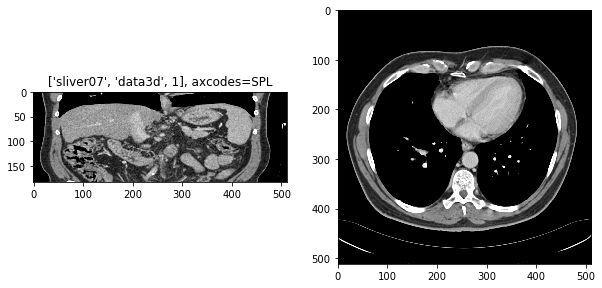

In [13]:
# number of 3d images per dataset
n = 2
for args in (
    ["pilsen_pigs", "data3d", 24],
    ["3Dircadb1", "data3d", 1],
    ["sliver07", "data3d", 1],
):
    #     print(args)
    #     print(io3d.datasets.get_dataset_path(*args))
    datap = io3d.datasets.read_dataset(*args, orientation_axcodes="SPL")

    plt.figure(figsize=(10, 8))
    plt.subplot(121)
    plt.title(f"{args}, axcodes={datap.orientation_axcodes}")
    plt.imshow(datap.data3d[:, 256, :], cmap="gray", vmin=-160, vmax=240)
    plt.subplot(122)
    plt.imshow(datap.data3d[0, :, :], cmap="gray", vmin=-160, vmax=240)

    plt.show()